# List of Processes

In [5]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

## #1. Wiener Process

Text(0, 0.5, 'W(t)')

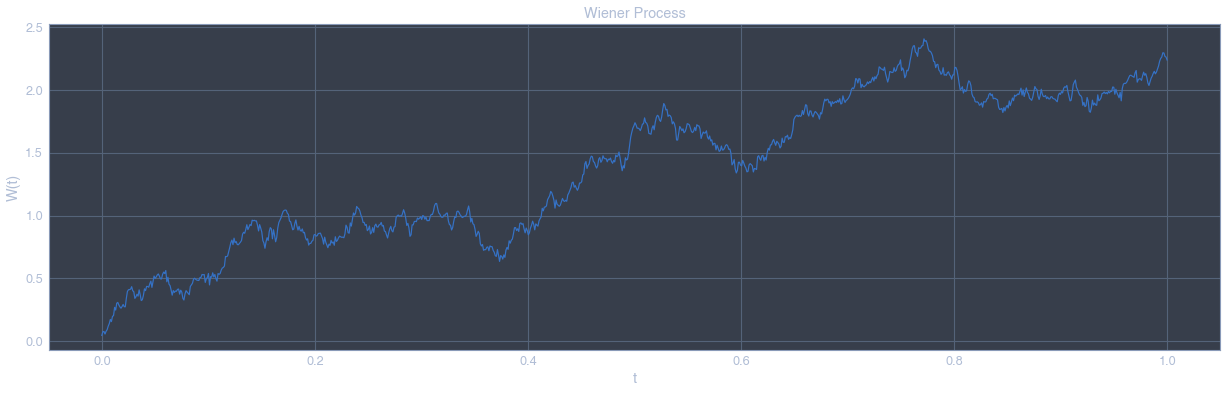

In [4]:
def wiener_process(T=1, N=1000, mu=0, sigma=1):
    dt = T / N
    t = np.linspace(0, T, N)
    
    # Нормально распределенные приращения
    dW = np.random.normal(mu*dt, sigma*np.sqrt(dt), N)
    
    # Кумулятивная сумма (винеровский процесс)
    W = np.cumsum(dW)
    
    return t, W

t, W = wiener_process(T=1, N=1000)

plt.figure(figsize=(21, 6))
plt.plot(t, W)
plt.title('Wiener Process')
plt.xlabel('t')
plt.ylabel('W(t)')

## #2. Poisson Process

All events: 19
Time: [0.19393223 0.51748118 0.64559161 1.15707884 3.08824583 3.55077674
 3.77221545 4.29401826 4.35959718 5.4571764 ]


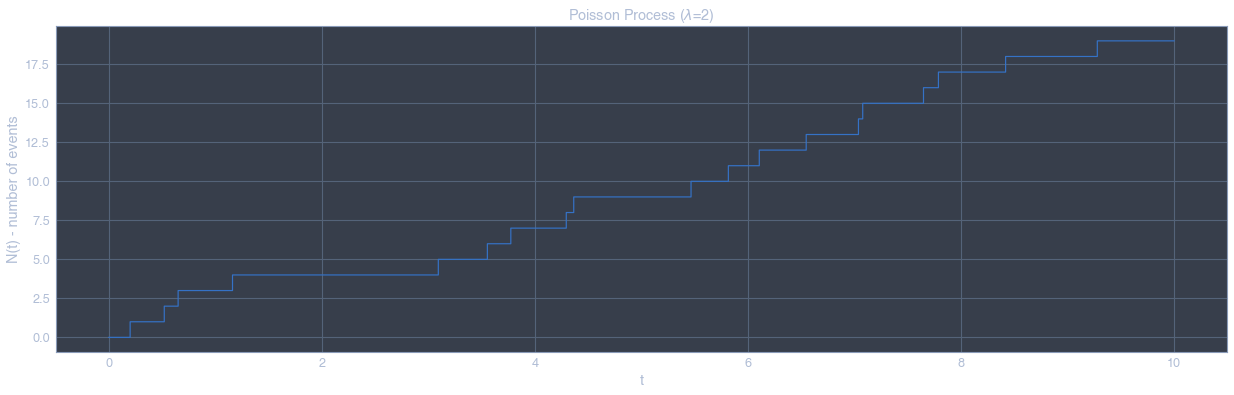

In [7]:
def poisson_process(λ=1, T=10): # \lambda + TAB
    # Время между событиями распределено экспоненциально
    times = []
    current_time = 0
    
    while current_time < T:
        # Время до следующего события
        interarrival = np.random.exponential(1/λ)
        current_time += interarrival
        
        if current_time < T:
            times.append(current_time)
    
    # Количество событий в каждый момент времени
    t_values = np.linspace(0, T, 1000)
    counts = [len([t for t in times if t <= t_val]) for t_val in t_values]
    
    return np.array(times), t_values, np.array(counts)

event_times, t_values, counts = poisson_process(λ=2, T=10)

plt.figure(figsize=(21, 6))
plt.step(t_values, counts, where='post')
plt.title('Poisson Process ($\lambda$=2)')
plt.xlabel('t')
plt.ylabel('N(t) - number of events')

print(f"All events: {len(event_times)}")
print(f"Time: {event_times[:10]}")